# Actividad EDA

#### 1. Cargar Librerías

In [27]:
##Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#### Funciones

In [28]:
### Función cargar data sea .csv o .xlsx
def importDatos(ruta, archivo, ext, sepa):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext, sep=sepa)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión Diferente')

## Función para datos NAN -> Null -> 0 (IRQ) -> NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

# Función para cambiar datos de texto a numerico float64
def cambioTextNum(df, nomCol, tipo):
    df[nomCol] = df[nomCol].astype(tipo)
    return df[nomCol]

# Función modificar a 1 y 0 los datos categóricos
def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

##Función de label encoder
def Codificacion(df, nomCol):
    label_e = LabelEncoder()
    df[nomCol] = label_e.fit_transform(df[nomCol])
    return df[nomCol]

##Función multigraficas
def multigraf (df, coluno, coldos):
    g = sns.FacetGrid(df, col=coluno)
    g.map(sns.histplot, coldos)
    return g

##Funcion multigraficas para tres variables
def multigrafTres (df, coluno, coldos, coltres):
    h = sns.FacetGrid(df, col=coluno, height=4, aspect=.5)
    h.map(sns.barplot, coldos, coltres, order=['M','F'])
    return h

##Función de barras y de dispersion
def barras(df, colx, coly, cruce):
    sns.catplot(x=colx, y=coly, hue=cruce, kind='bar', data=df)

def dispersion (df, cruce, num, numdos):
    g = sns.FacetGrid(df, hue=cruce, palette='flare', height=5)
    g.map(sns.scatterplot, num, numdos, s=100, alpha=0.5)
    g.add_legend()
    return g

from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm
    
## Función para hacer la matriz de correlación de manera Tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

## Análisis inicial

In [29]:
### Cargue de datos
notas = importDatos('./Dataset/','student-mat','.csv',';')


notas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Gráficas

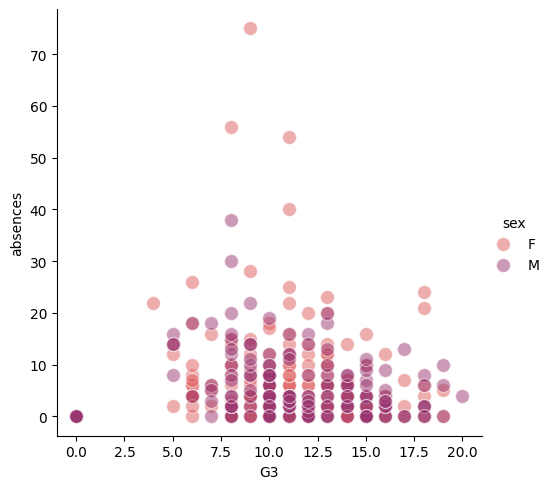

In [30]:
dispersion(notas, 'sex','G3','absences')

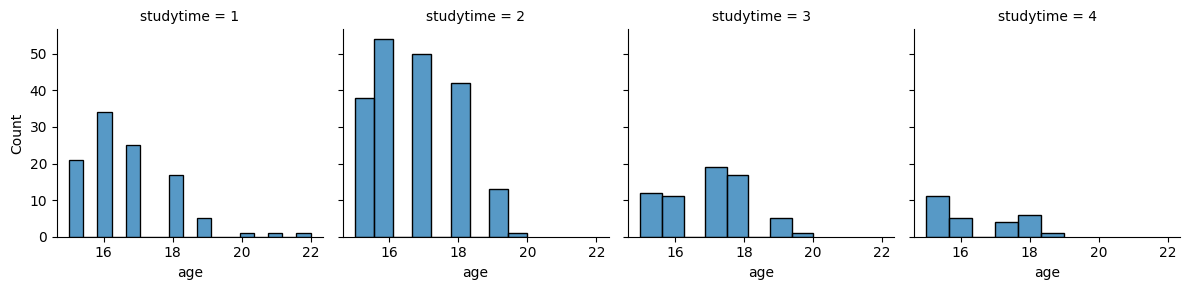

In [31]:
multigraf(notas, 'studytime','age')

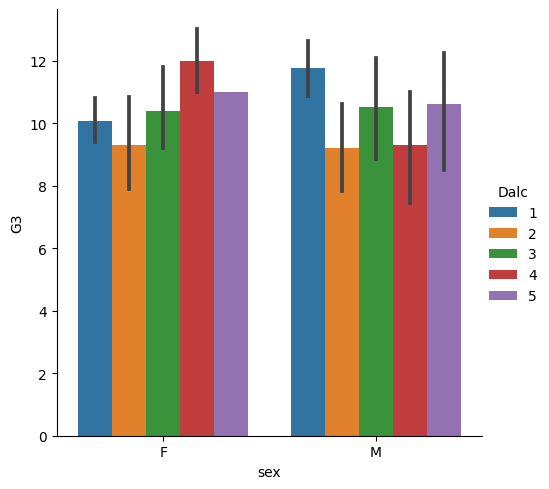

In [32]:
barras(notas, 'sex','G3','Dalc')

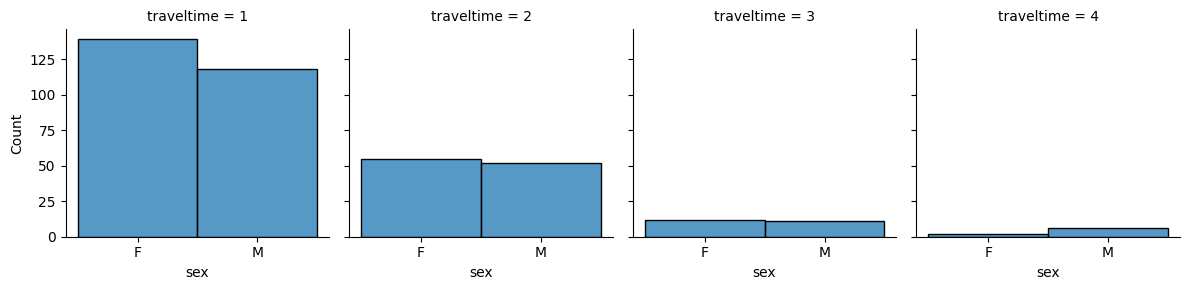

In [33]:
multigraf(notas, 'traveltime','sex')

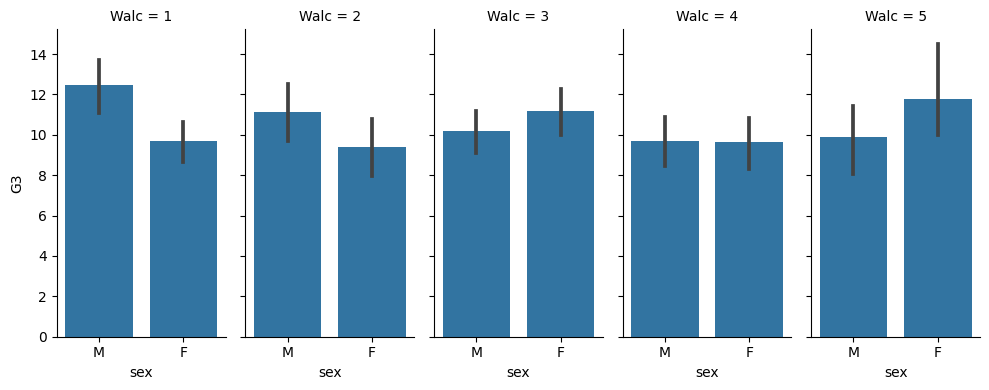

In [34]:
multigrafTres(notas, 'Walc','sex','G3')

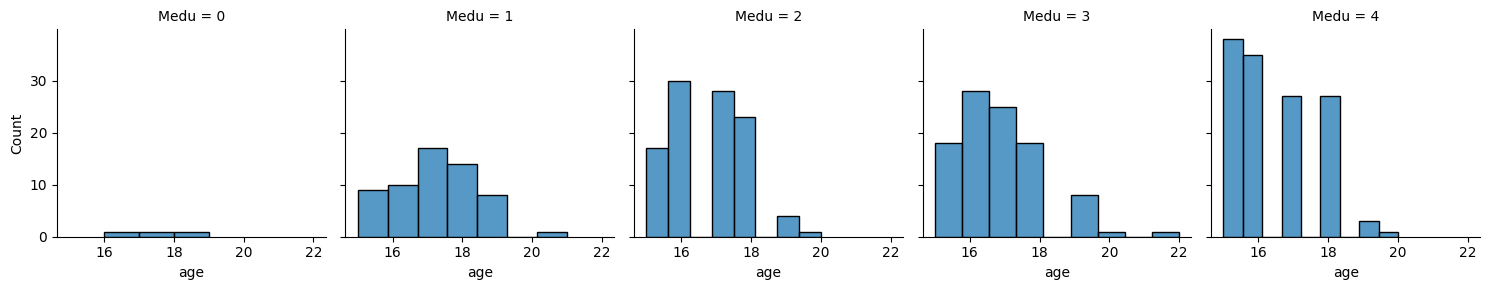

In [35]:
multigraf(notas, 'Medu','age')

In [36]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [37]:
## Reemplazar por 0 y 1 los valores de School, Sex, Address, Famsize, Pstatus, Schoolsup, Famsup, Paid, Activities, Nursery, Higher, Internet y Romantic 

notas['school'] = camTextBi(notas, 'school','GP', 0, 1)
notas['sex'] = camTextBi(notas, 'sex','F', 0, 1)
notas['address'] = camTextBi(notas, 'sex','U', 0, 1)
notas['famsize'] = camTextBi(notas, 'famsize','GT3', 0, 1)
notas['Pstatus'] = camTextBi(notas, 'Pstatus','T', 0, 1)
notas['schoolsup'] = camTextBi(notas, 'schoolsup','no', 0, 1)
notas['famsup'] = camTextBi(notas, 'famsup','no', 0, 1)
notas['paid'] = camTextBi(notas, 'paid','no', 0, 1)
notas['activities'] = camTextBi(notas, 'activities','no', 0, 1)
notas['nursery'] = camTextBi(notas, 'nursery','no', 0, 1)
notas['higher'] = camTextBi(notas, 'higher','no', 0, 1)
notas['internet'] = camTextBi(notas, 'internet','no', 0, 1)
notas['romantic'] = camTextBi(notas, 'romantic','no', 0, 1)

datos_NAN(notas)

notas.head()

Dimesiones: 395 filas, 33 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                  school      int32           2          0
                                     sex      int32           1          0
                                     age      int64           8          0
                                 address      int32           1          0
                                 famsize      int32           2          0
                                 Pstatus      int32           2          0
                                    Medu      int64           5          0
                                    Fedu      int64           5          0
                                    Mjob     object           5          0
                                    Fjob     object           5          0
                                  reason     object           4          0
                                gua

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,1,0,1,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,1,17,1,0,0,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,1,15,1,1,0,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,1,15,1,0,0,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,1,16,1,0,0,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [38]:
### Convertimos las variables categoricas que tangas mas de 2 datos a numericos
from sklearn import preprocessing

##Función de label encoder
def Codificacion(df, nomCol):
    label_e = LabelEncoder()
    df[nomCol] = label_e.fit_transform(df[nomCol])
    return df[nomCol]

label_e = preprocessing.LabelEncoder()

notas['Mjob'] = label_e.fit_transform(notas['Mjob'])
notas['Fjob'] = label_e.fit_transform(notas['Fjob'])
notas['reason'] = label_e.fit_transform(notas['reason'])
notas['guardian'] = label_e.fit_transform(notas['guardian'])

In [39]:
datos_NAN(notas)

Dimesiones: 395 filas, 33 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                  school      int32           2          0
                                     sex      int32           1          0
                                     age      int64           8          0
                                 address      int32           1          0
                                 famsize      int32           2          0
                                 Pstatus      int32           2          0
                                    Medu      int64           5          0
                                    Fedu      int64           5          0
                                    Mjob      int32           5          0
                                    Fjob      int32           5          0
                                  reason      int32           4          0
                                gua

In [40]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int32
 16  famsup      395 non-null    int32
 17  paid        395 non-null    int32
 18  activities  395 non-null    int32
 19  nursery     395 non-null    int32
 20  higher      395 non-null    int3

In [41]:
### variables numéricas
categoricas = [i for i in notas.columns if notas[i].dtype=='O']

categoricas

[]

## Generamos un backup de la data original normalizada, dropeando unas variables para obtener un modelo más organizado.

In [42]:
datadp = notas

datadp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int32
 16  famsup      395 non-null    int32
 17  paid        395 non-null    int32
 18  activities  395 non-null    int32
 19  nursery     395 non-null    int32
 20  higher      395 non-null    int3

In [43]:
## Dropeamos "sex","address","schoolsup", "studytime", "Walc", "higher", "failures", "age", "traveltime", "guardian", "romantic", "goout"

datadp = datadp.drop(["sex","address","schoolsup", "studytime", "Walc", "higher", "failures", "age", "traveltime", "guardian", "romantic", "goout"], axis = 1)

## Normalización

In [44]:
datNorm = normaData(datadp)

datNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.116456,0.321177,0.0,0.000000,0.000000,0.000000,1.0
famsize,395.0,0.288608,0.453690,0.0,0.000000,0.000000,1.000000,1.0
Pstatus,395.0,0.103797,0.305384,0.0,0.000000,0.000000,0.000000,1.0
Medu,395.0,0.687342,0.273684,0.0,0.500000,0.750000,1.000000,1.0
Fedu,395.0,0.630380,0.272050,0.0,0.500000,0.500000,0.750000,1.0
Mjob,395.0,0.542405,0.306868,0.0,0.500000,0.500000,0.750000,1.0
Fjob,395.0,0.570253,0.215885,0.0,0.500000,0.500000,0.750000,1.0
reason,395.0,0.418565,0.402745,0.0,0.000000,0.333333,1.000000,1.0
famsup,395.0,0.612658,0.487761,0.0,0.000000,1.000000,1.000000,1.0
paid,395.0,0.458228,0.498884,0.0,0.000000,0.000000,1.000000,1.0


In [45]:
##Test de ShapiroWilk
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(datNorm)

,Variable,Valores P,Concepto
0,school,1.151209e-34,No es una variable Normal
1,famsize,4.301020e-30,No es una variable Normal
2,Pstatus,3.963587e-35,No es una variable Normal
3,Medu,2.815527e-18,No es una variable Normal
4,Fedu,2.706835e-17,No es una variable Normal
5,Mjob,4.674331e-16,No es una variable Normal
6,Fjob,4.059509e-20,No es una variable Normal
7,reason,7.392824e-22,No es una variable Normal
8,famsup,1.150231e-28,No es una variable Normal
9,paid,3.598079e-28,No es una variable Normal


In [46]:
##Test de normalidad de D'agostino - Asimetría y curtosis
from scipy.stats import normaltest
def DAgostino(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = normaltest(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfDago = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfDago

DAgostino(datNorm)

,Variable,Valores P,Concepto
0,school,3.810206e-42,No es una variable Normal
1,famsize,4.685788e-43,No es una variable Normal
2,Pstatus,4.410013e-47,No es una variable Normal
3,Medu,1.170611e-28,No es una variable Normal
4,Fedu,5.756463e-51,No es una variable Normal
5,Mjob,5.620942e-06,No es una variable Normal
6,Fjob,1.414784e-04,No es una variable Normal
7,reason,0.000000e+00,No es una variable Normal
8,famsup,0.000000e+00,No es una variable Normal
9,paid,0.000000e+00,No es una variable Normal


<Axes: >

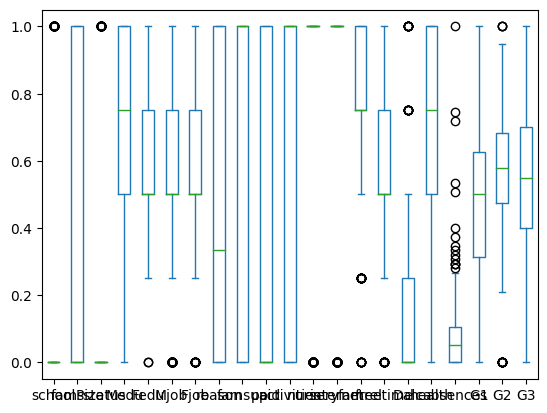

In [47]:
datNorm.plot.box()

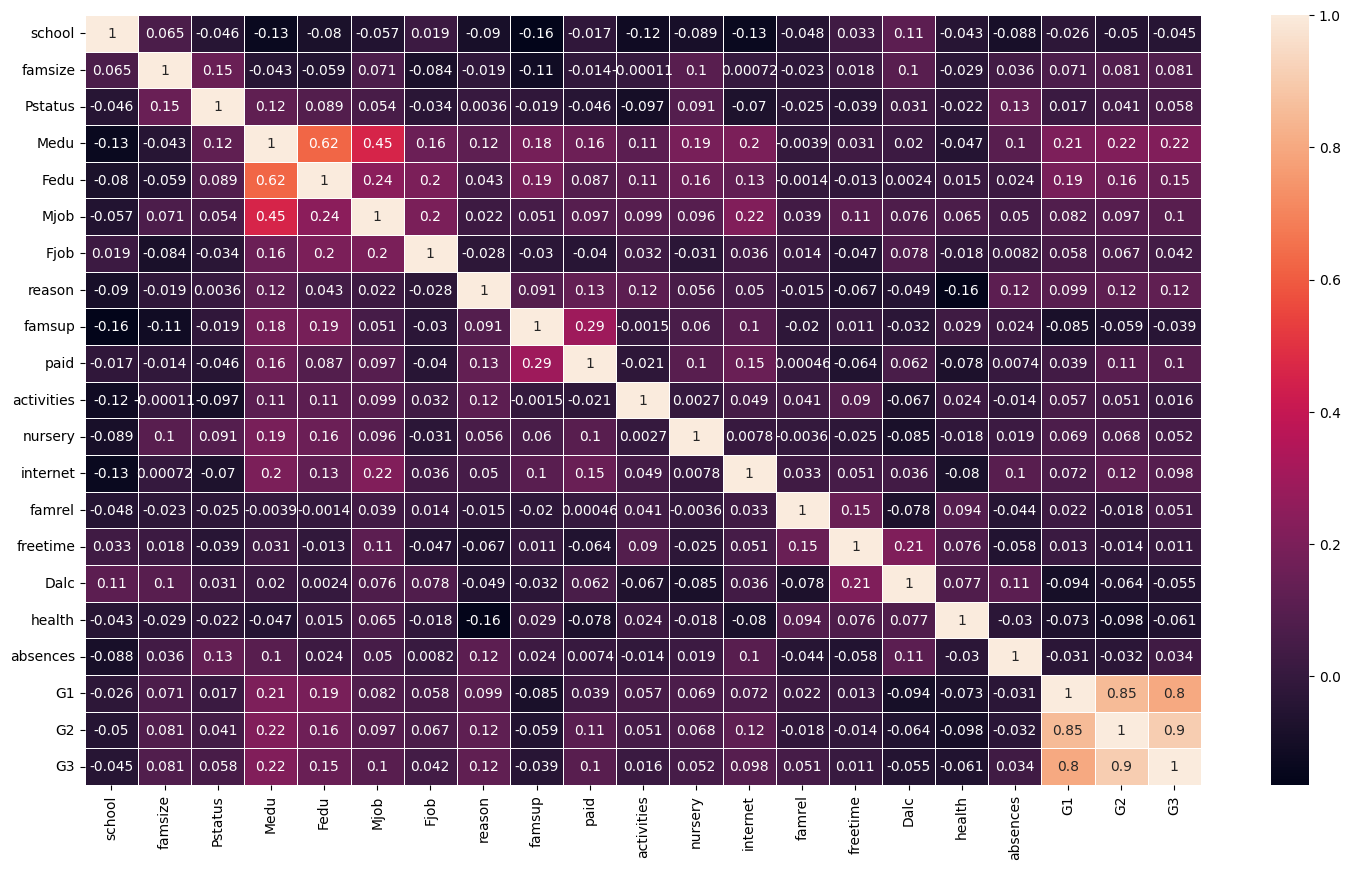

In [48]:
##Diagrama de correlacion
def DiagCorr(df, tamuno, tamdos):
   f, ax = plt.subplots(figsize=(tamuno,tamdos))
   sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)


DiagCorr(datNorm, 18,10)

In [49]:
##Correlaciones
corr_matrix = datNorm.corr(method='spearman')

correlaciones = tidy_corr_matrix(corr_matrix)

In [50]:
mejCorrelaciones = correlaciones[correlaciones['r']> 0.5]

mejCorrelaciones

,variable_1,variable_2,r,abs_r
439,G3,G2,0.957125,0.957125
419,G2,G3,0.957125,0.957125
397,G1,G2,0.894792,0.894792
417,G2,G1,0.894792,0.894792
438,G3,G1,0.878001,0.878001
398,G1,G3,0.878001,0.878001
87,Fedu,Medu,0.631577,0.631577
67,Medu,Fedu,0.631577,0.631577


## Modelo Uno

In [51]:
##Revisión de datos NAN
datNorm.isnull().sum().sum()

0

In [52]:
##Extraemos Variable Predictoria
X = datNorm.drop(['G3'],axis=1) 
y = datNorm['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=80)

mlUno = LinearRegression()

mlUno.fit(X_train, y_train)

y_pred = mlUno.predict(X_test)

round(r2_score(y_test, y_pred),3)

0.84

In [53]:
rmse = mean_squared_error(y_test, y_pred)

round(rmse, 7)

0.0087351

In [54]:
mlDos = LinearRegression()

mlDos.fit(X_test, y_test)

y_predDos = mlDos.predict(X_test)

round(r2_score(y_test, y_predDos),3)

0.873

In [55]:
rmseDos = mean_squared_error(y_test, y_predDos)

round(rmseDos, 7)

0.0069489

<Axes: xlabel='G3', ylabel='Density'>

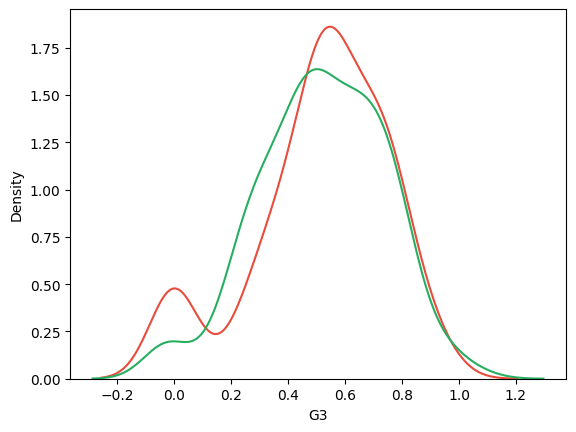

In [56]:
##Grafica del modelo
ax1 = sns.distplot(y_test, hist=False, color='#E74C3C', label='Valores actuales')
sns.distplot(y_predDos, hist=False, color='#27AE60', label='Valores predecidos')

In [58]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

mlTres = sm.OLS(y_train, X_train_sm).fit()

mlTres.params

print(mlTres.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     49.66
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           2.34e-69
Time:                        23:03:53   Log-Likelihood:                 221.01
No. Observations:                 237   AIC:                            -400.0
Df Residuals:                     216   BIC:                            -327.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1282      0.043     -2.959      0.0

In [59]:
X_test_sm = sm.add_constant(X_test)

mlCuatro = sm.OLS(y_test, X_test_sm).fit()

mlCuatro.params

print(mlCuatro.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     47.07
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           2.16e-51
Time:                        23:04:03   Log-Likelihood:                 168.37
No. Observations:                 158   AIC:                            -294.7
Df Residuals:                     137   BIC:                            -230.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1421      0.054     -2.650      0.0

In [ ]:
## Exportación de la Data Final
datadp.to_csv('EstudiantesFinal.csv', sep = ';')

#### Podemos concluir que la gráfica del modelo, los valores de "testeo" y "predDos", ambos valores se tienden a centrar en un valor central. Quiere decir que el modelo de regresión lineal utilizado para predecir "y_predDos", tiende a ser preciso.


#### Observando los resultados del R-squared del "mlTres" y "mlCuatro", podemos observar que nos da un valor que se encuentran en un rango muy cercano a 1, quiere decir que el modelo se adecua bien a los datos.